# Traveling waves 

Now that we've modeled the basic stochastic dynamics of growing populations, we'd like to embed them in space. In the simplest case, we can imagine that each particle is merely diffusing without any active motion in a certain direction.

Will we observe some collective motion of the entire population?


Now, the state of the population is describe not only by a single number (the total population size) but by a field, $c(x,t)$ measuring the number density of the population at position $x$ and time $t$. This makes the problem infinite dimensional and, thus, very challenging in general. 

Still, progress can be made in special cases, for example
* in deterministic limits
* if growth and death rates are strictly constant 

We treat both cases consecutively. 

## Deterministic Analysis

We begin by analyzing a deterministic scenario of a traveling wave.
To this end, we generalize our deterministic branching process to space,

$$
\partial_t c=D\partial_x^2 c+ (a-b) c
$$
If $r\equiv a-b$ is constant, this equation can be analyzed by substituting $c(c,t)=\psi(c,t)e^{rt}$, we obtain

$$
\partial_t \psi=D\partial_x^2 \psi \;.
$$
We have thus obtained a simple diffusion equation without growth. It is straight-forward to show that a widening Gaussian is the solution to a localized initial condition. In terms of the number density, this solution reads

$$
c(x,t)=e^{r t}e^{\frac{-x^2}{4Dt}} (4\pi Dt)^{-1/2}\;.
$$

Although the solution has a well-defined peak, its tails extend to infinity. In any real simulation of discrete particles, there will instead be a most advanced particle. 

We can try to estimate the position of the most advanced particle in an adhoc way by asking: "At what position will the density drop below some threshold density $\epsilon$?" This should occur for $x>\ell(t)$ where $c(\ell(t),t)=\epsilon$, yielding $\ell(t)\sim v_F t$ where $v_F$ is the so-called Fisher-Kolmogorov velocity, 

$$
v_F=2\sqrt{Ds}\;.
$$

## Finite population densities
By estimating the most advanced individual, we have just analyzed our first effect of the discreteness of the particles. Our answer is even asymptotically correct, as it is based on the correct mean number density for fixed birth and death rates and the relative uncertainty vanishes on long times. The relative simplicity of our analysis stems from the linearity of the underlying equation of motion.  


Once, we introduce non-linearities to limit the population size, a deterministic analysis becomes not only adhoc but asymptotically incorrect. Number fluctuations modify the behavior of dynamic processes in interesting (singular) ways, as we will see. 

The simplest way to introduce a finite population is to introduce a quadratic non-linearity that induces saturation at a finite number density, called carrying capacity $K$, 

$$
\partial_t c=D\partial_x^2 c+r c \left(1-\frac cK\right) \;.
$$ (FKPP-eq)

After some relaxation time, we expect the population to settle into a steadily moving wave train. In the co-moving frame, we find

$$
0=D\partial_x^2 c+v \partial_x c + r c \left(1-\frac cK\right) \;.
$$ 

In the tip of the wave, where $c\ll K$, one can focus on the linearized version of this equation and finds an exponentially decaying density profile $c\sim e^{-k x}$ where $k$ satisfies $D k^2-v k+r=0$. This quadratic equation has a solution with positive $k$ only if the speed is larger or equal to the Fisher velocity $v\geq v_F=2\sqrt{D r}$. Which velocity is realized however? 

That velocity selection problem requires some thought in general, but has an easy answer for localized initial conditions. In that case, we already know that the FKPP equation without non-linearity, which maps to the mean branching random walk, has a front that advances at speed equal to $v_F$. Obviously, adding a negative term to the right side cannot *accelerate* the wave. Therefore, we can conclude that even the above non-linear waves travel, asymptotically, at the speed of the classical Fisher wave speed. Indeed, a more careful analysis shows that any initial condition with compact support leads to waves with $v=v_F$ and to an asymptotic density profile $c\sim e^{v x/2 D}$.


```{figure} ../images/FKPP-rolling-ball-analogy.jpg
---
height: 300px
name: rolling-balls
---
Rolling ball analogy for the steady state equation describing the FKPP wave profile 
```



```{admonition} Different types of traveling waves
Waves are called pulled if the most advanced individuals have the largest growth rate. The ball analogy for those waves looks as in Fig. X a with a ball running down a hill onto a plane. Pushed and, more recently discovered, semi-pushed{cite}`birzu2018fluctuations` waves have reduced growth rates in the wave tip. The corresponding ball analogy is sketched in Fig. Xb, where a ball runs from one peak through a valley to a lower laying hill.
```


## Effects of discreteness

Our discussion of traveling waves ignored the fact that individuals are discrete. An exponentially decaying density can only make sense in an average sense when the density drops below one and that then implies the existence of fluctuations. It turns out these fluctuations crucial influence the behavior of waves.

One can show that the correct noisy version of the above dynamics requires to leading order on the right hand side of the FKPP equation a noise term of the form $ \eta(x,t)\sqrt{c}$ where the $\eta$ is uncorrelated white noise, $\eta(x,t)\eta(x',t')=\delta(x-x')\delta(t-t')$.

The FKPP equation {eq}`FKPP-eq` amounts to approximating $\langle c^2\rangle=\langle c\rangle^2$. It turns out that this mean-field approximation is problematic. The velocity is reduced by a singular correction that cannot be obtained through perturbation analysis. More serious are the consequences for models of adaptation, which do not even have a finite wave speed in the mean-field approximation, and for the genealogical structures generated by these waves. 

A lot of work has been done to implement the consequences of discreteness, most of them being adhoc at some level. Below I present an adhoc recipe that has given correct answers to leading order for many cases.

This method requires us to first extend our understanding of branching processes to space and introduce the concept of gene surfing.



### Simple code to simulate FKPP waves

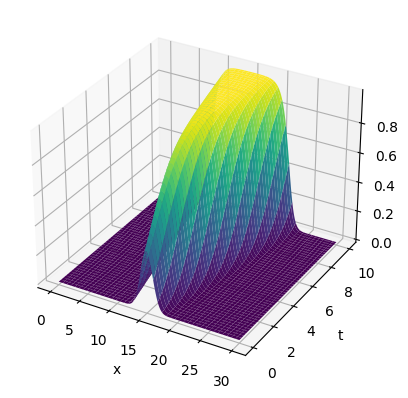

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
D = 0.1  # Diffusion coefficient
a = 1.0  # Fisher-Kolmogorov parameter
L = 30.0  # Length of the domain
T = 10.0  # Simulation time
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size

sigma0 = 1 # initial width
N0 = 1 # initial cummulative value

# Calculate the number of spatial and temporal steps
N = int(L / dx) + 1
M = int(T / dt) + 1

# Initialize the solution matrix
u = np.zeros((M, N))

# Set the initial condition
u[0, :] = N0/(sigma0 * np.sqrt(2 * np.pi)) * np.exp( - (np.linspace(0, L, N)-L/2)**2 / (2 * sigma0**2))
                      
#u[0, :] = np.sin(np.pi * np.linspace(0, L, N) / L)

# Apply the finite difference method
for k in range(M - 1):
    for i in range(1, N - 1):
        u[k + 1, i] = u[k, i] + dt * (
            D * (u[k, i - 1] - 2 * u[k, i] + u[k, i + 1]) / dx**2 +
            a * u[k, i] * (1 - u[k, i])
        )

# Plot the results
x = np.linspace(0, L, N)
t = np.linspace(0, T, M)
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

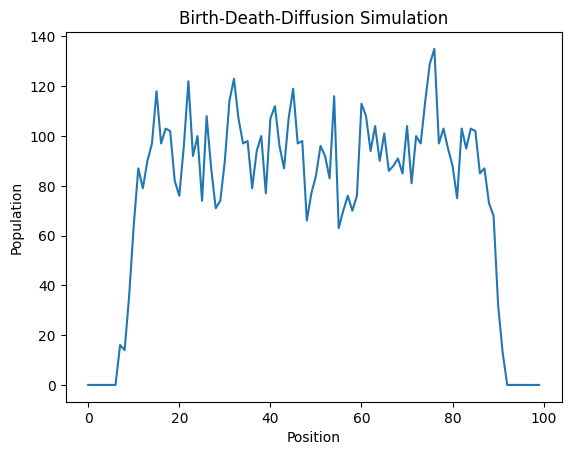

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Length of the lattice
T = 500  # Simulation time
D = 0.1  # Diffusion coefficient
r = 0.1  # net growth rate per particle
K = 100 # carrying capacity
dt = 0.1  # Time step size

# Initialize the lattice
lattice = np.zeros(L, dtype=int)

# Set initial conditions
midpoint = L // 2
lattice[midpoint] = 1000

# Simulation
for t in range(T):
    new_lattice = np.copy(lattice)
    for i in range(L):
        # Calculate diffusion
        left = lattice[i-1] if i > 0 else lattice[L-1]
        right = lattice[i+1] if i < L-1 else lattice[0]
        diffusion = D * (left + right - 2 * lattice[i])
        
        # Calculate birth and death
        netgrowth = r * lattice[i] * (1-lattice[i] / K)
        
        # Update particle count
        new_lattice[i] += diffusion + netgrowth
    
    # Compute new number of individuals from Poisson distribution
    new_lattice = np.random.poisson(new_lattice * np.heaviside(new_lattice , 0))
    
    # Update lattice
    lattice = new_lattice

# Plot the results
x = np.arange(L)
plt.plot(x, lattice)
plt.xlabel('Position')
plt.ylabel('Population')
plt.title('Birth-Death-Diffusion Simulation')
plt.show()


    # Plot the results
    x = np.arange(L)
    plt.plot(x, lattice)
    plt.xlabel('Position')
    plt.ylabel('Population')
    plt.title('Traveling Wave at Time t = {}'.format(t))
    plt.show()

# Create the slider widget
time_slider = widgets.FloatSlider(value=0.0, min=0.0, max=T, step=dt, description='Time')

# Create the interactive plot
interactive_plot = widgets.interactive(update_plot, t=time_slider)

# Display the interactive plot
display(interactive_plot)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Parameters
L = 100  # Length of the lattice
T = 500  # Simulation time
D = 0.1  # Diffusion coefficient
birth_rate = 0.5  # Birth rate per particle
death_rate = 0.5  # Death rate per particle
dt = 0.1  # Time step size

# Initialize the lattice
lattice = np.zeros(L, dtype=int)

# Set initial conditions
midpoint = L // 2
lattice[midpoint] = 1000

# Function to update the plot
def update_plot(t):
    # Simulation
    for k in range(int(t / dt)):
        new_lattice = np.copy(lattice)
        for i in range(L):
            # Calculate diffusion
            left = lattice[i - 1] if i > 0 else lattice[L - 1]
            right = lattice[i + 1] if i < L - 1 else lattice[0]
            diffusion = D * (left + right - 2 * lattice[i])

            # Calculate birth and death
            birth = birth_rate * lattice[i]
            death = death_rate * lattice[i]

            # Update particle count
            new_lattice[i] += int(diffusion + birth - death)

        # Compute new number of individuals from Poisson distribution
        new_lattice = np.random.poisson(new_lattice)

        # Update lattice
        lattice = new_lattice

    # Plot the results
    x = np.arange(L)
    plt.plot(x, lattice)
    plt.xlabel('Position')
    plt.ylabel('Population')
    plt.title('Traveling Wave at Time t = {}'.format(t))
    plt.show()

# Create the slider widget
time_slider = widgets.FloatSlider(value=0.0, min=0.0, max=T, step=dt, description='Time')

# Create the interactive plot
interactive_plot = widgets.interactive(update_plot, t=time_slider)

# Display the interactive plot
display(interactive_plot)


UnboundLocalError: local variable 'lattice' referenced before assignment

The above code is modified version of what ChatGPT gave me when I asked "write a simple python code to simulate a traveling Fisher Kolmogorov wave":

This code uses a finite difference method to solve the Fisher-Kolmogorov equation with diffusion. It initializes a matrix u to store the solution at each time step. The initial condition is set as a sine wave, and then the finite difference method is applied iteratively to calculate the solution at each time step. Finally, the results are plotted using a 3D surface plot.

Please note that this code is a basic implementation and may not handle certain edge cases or optimizations. You can modify the parameters and experiment with different initial conditions to observe the behavior of the traveling Fisher-Kolmogorov wave.

## Gene Surfing
Taking discreteness into account is difficult in general. Forward in time, a branching process gives rise to a genealogical tree (show figure). Each time a birth event happens, a lineage splits into two, and both lineages have to be followed to describe the downstream dynamics fully probabilistically. That attempt is feasible if birth and death rates are constant but often impossible if they depend on the stochastic dynamics itself. 

In these many-body problems of a branching tree, one can  obtain a simpler single-body problem by taking a retrospective view: Sample one individual at the final time, i.e. a "tip" of the genealogical tree, and follow its lineage backward in time. A lineage traveling backward in time has the advantage that it neither splits nor ends, i.e. we only have to deal the degrees of freedom of just one particle. That can be useful if one knows the field of growth rates and used as a tool to enforce consistency of the dynamics. 

To make this concrete, imagine sampling a particle of the a traveling wave and following it's lineage backward in time. To describe the ancestral process of said lineage by the probability density $G(\xi,\tau|x,t)$ that an individual presently, at time t and located at x, has descended from an ancestor that lived at $\xi$ at the earlier time $\tau$. In this context, it is natural to choose time as increasing towards the past, $\tau>t$, and to consider $(\xi,\tau)$ and $(x,t)$ as final and initial state of the ancestral trajectory, respectively. With this convention, the distribution G satisfies the initial condition $G(\xi,\tau|x,t)=\delta(\xi-x)$.

```{admonition} Notation
For space-time trajectories, we will use the convention that co-ordinates in greek letters $(\xi,\tau)$ refer to the starting point of the trajectory  and those in roman letters $(x,t)$  refer to the end point. 
```

Since a lineage cannot branch or end, all that it can do is to move around. If this movement is continuous and memory-less, we obtained a biased diffusion process. To describe this process, we develop a biased diffusion equation for the Greens function $G$.

Since $G$ is a pdf, it has to satisfy a continuity equation,

$$
\partial_\tau G=-\partial_\xi j\;,
$$

which simply ensures that the lineage is somewhere (conservation of probability). The probability current $j(\xi,\tau)$ is given by

$$
j=-D_*\partial_\xi G+ v_* G \;,
$$

where the first term represents unbiased diffusion and the second part a deterministic bias with velocity $v_*(\xi,\tau)$.

We have the mathematical form of the diffusion equation, but what's the diffusivity and what's the bias? A simple calculation shows that the diffusivity, $D_*=D$ is the same as forward in time but that the bias is number density dependent,

$$
v_*(\xi,\tau)=2 D \partial_\xi\ln[c(\xi,t)]
$$

In the co-moving frame, we expect the particle current to vanish

$$
0=j=-D\partial_\xi G(\xi)+\left[v+2 D \partial_\xi \ln(c)\right] G(\xi)
$$

which predicts that the steady state distribution $G(\xi)$ of the common ancestors is given by

$$
G\propto c^2 e^{v \xi/D}
$$ (pdf-ancestors)

where the pre-factor is fixed by the normalization condition, $\int_\xi G=1$.

Using the mean-field solution $c \propto c^{-v \xi/(2D)}$ of the FKPP, one finds that $G$ should vanish everywhere because it is not normalizable.

```{figure} ../images/Distribution-of-common-ancestors.jpg
---
height: 300px
name: Doca
---
Measured bell-shaped distribution $G_\infty(\xi)$ as function of position $\xi$ relative to the FKPP wave front (sigmoidal lines) for varying carrying capacities $N$.
```




But simulations of stochastic traveling waves show that this steady state distribution is a bell-like shape in the wave tip, see {numref}`Doca`. Another hint that the mean-field solution to the number density is incorrect, in fact completely off. 

## Branching Random Walks
It turns out that a more appropriate approximation to noisy traveling waves can be obtained from taking a particle viewpoint from the beginning.

One of the most extreme consequences of discreteness is that lineages can go extinct. In fact, when birth and death rates are nearly the same, the probability $u$ of survival is very low, of order the relative growth rate difference $s$. We arrived at this conclusion by deriving and solving a differential equation for the survival probability, which read

$$
-\partial_\tau u(t|\tau)=s u(t|\tau)- u^2(t|\tau) \;.
$$

Generalizing this equation to the case of diffusion and spatially varying growth rates $s(\xi,\tau)$, one obtains

$$
-\partial_\tau u (x,t|\xi,\tau)=D\partial_x u^2+s(\xi,\tau) u- u^2 \;.
$$  (u-FKPP)

Deriving this equation is a useful exercise, for which one has to retrace the same steps as for the non-spatial equation with the addition that one needs to account for the rates of dispersal. Notice that {eq}`u-FKPP` has a similar shape as the FKPP equation. 

In the frame co-moving with the wave traveling in the $-x$ direction backward in time, we have

$$
 0 =D\partial_x u^2+ v \partial_x u+s(x) u- u^2 \;,
$$  (u-FKPP)

where $s(x)=1-c(x)$ is given in terms of the density. To close this equation, we need an expression for the number density $c$ in terms of the survival probability $u$. Such a connection is provided by equation {eq}`pdf-ancestors` for the distribution of common ancestors, once we recognize that  

$$
G(x,\infty|\xi,\tau)=u(\xi,\tau) c(\xi,\tau) \;.
$$  (G-u-c)

To see {eq}`G-u-c`, notice that the probability that, at time $\tau$, the common ancestor of future generations is at $\xi$ is the same as the probability that any particle at $\xi$ is going to survive forever, which is given by $u c$.

Combining Eq.s {eq}`u-FKPP`, {eq}`pdf-ancestors` and {eq}`G-u-c`, we obtain

$$
 0 =D\partial_x c^2+ v \partial_x c+r c(1-c)- \frac{c^2 e^{v x/D}}{\int_x c^2 e^{v x/D}}\;.
$$ (c-cutoff)

The third term on the right-hand side furnishes the major difference to the naive mean-field approach. One might think, at first sight, that this non-linear term can be ignored in the tip of the wave, where the density decays to 0 and $c^2\ll c$. But the exponential amplification factor ensures that this factor becomes a leading order term sufficiently far out in the tip of the wave.

## Consequences of tip fluctuations

### FKPP waves

Assuming an overall decay $c \sim N e^{-v x/(2 D)}$, it is easy to see that the quadratic cut-off term becomes of comparable to the first order terms when $x_c \sim \ln(N)$. For $x>x_c$, the density decays faster, $c\sim e^{-v x/D}$, just as if there is no growth beyond $x_c$. I.e. the leading order effect of the fluctuation-induced term is to introduce a growth cutoff at $x_c$. Therefore, the linearized equation

$$
\partial_t c =D\partial_x^2 c+ v \partial_x c+r c 
$$ (FKPP-linear)

has to be solved between $x=0$ and $x=\ln(N)$. To do this, it is convenient to introduce the variable transform 

$$
c(x,t)=\phi(x,t) e^{-\frac{vx}{2D}}
$$ (var-trafo)

through which {eq}`FKPP-linear` is transformed into 

$$
\partial_t \phi =D\partial_x^2 \phi+ \left(r-\frac{v^2}{4D} \right) \phi\;,
$$ (FKPP-linear-trafo)

which has a *Hermitian* operator on the RHS. {eq}`FKPP-linear-trafo` has the shape of a Schroedinger equation in imaginary time. The non-linearities of the original equation {eq}`c-cutoff` effectively generate two absorbing boundary conditions for $\phi(x)$, one at $x=O(\ln N)$ and one at $x=O(1)$.  

We can solve equation {eq}`FKPP-linear-trafo` subject to these boundary conditions in terms of normal modes. To ensure a steady state in the co-moving frame, we have to demand that the ground state (lowest mode) has vanishing energy. All higher modes have higher energy, and therefore decay over time. The higher the mode number (the more nodes the eigen function has / the more rapidly it varies in space) the faster its relaxation to 0. Since the growth rate is constant between the two absorbing boundaries, we essentially have the mode spectrum of a particle in a 1D-box, which are cosine modes. 

To fix the wave speed, we focus on the ground state,

$$
\phi_0(x)\sim \cos\left(\frac{\pi x}{\ln(N)\sqrt{D/r}}\right)
$$

which solves {eq}`FKPP-linear-trafo` at steady state ($\partial_t \phi=0$) if 

$$
0=-r\left(\frac{\pi }{\ln(N)}\right)^2 + \left(r-\frac{v^2}{4D}\right) 
$$

implying that 

$$
v = 2\sqrt{D r}\left(1-\frac{\pi^2}{\ln^2 N}\right) \;.
$$

So, the cutoff leads to a reduction of the wave speed, which only slowly vanishes as $\ln N$ goes to infinity. In particular, it cannot be captured by a perturbation theory in the noise strength $N^{-1}$. 

The consequences of the cutoff on genealogical processes are even more pronounced. Without going into the details, we merely argue intuitively here. Due to the the second cutoff, lineages are localized on a scale $\ln N$ and caused to coalesce on a time scale $T_c\sim \ln^3 N$, which diverges when $N\to \infty$.  

## Fitness waves

Traveling waves  not only occur in real space. They are often used to describe how the distribution of a trait, such as growth rate, height, strength etc. across a population shifts over time in response to a changing environment or in response to self-organization. The most classical of these waves is a wave of adaptation, where growth rate, or fitness, shifts towards larger values in response to the occurrence of fitter types (due to mutations) and their take over within the population.

A simple model to describe this situation is 

$$
\partial_t c_n = U \left(c_{n-1}-c_{n}\right)+ s(n-\overline{n})c + \eta \sqrt{c_n} \;,
$$  (eq-staircase)

where it is assumed that beneficial mutations  all beneficial mutations have the same fitness effect $s$ and occur at rate $U$. The overline represents the population mean, $\overline{f_n}\equiv \sum_n c_n f_n$, so that $s\overline{n}$ is the mean fitness.

Two simple arguments constrain the leading order speed of these waves.

#### Adaptation speed depends on fitness variance

Multiplying {eq}`eq-staircase` with $s(n-\overline{n})$, integrating over $n$ and averaging over the noise yields

$$
 s \partial_t\overline n(t) = s^2\overline{ (n-\overline{n})^2} \;,
$$

i.e. the rate of increase in fitness (LHS) equals the variance in fitness (RHS), or 

$$
v=\sigma^2\;.
$$

When R. A. Fisher stumbled over this simple observation, he was apparently so excited that he called it "the fundamental law of natural selection", although it was soon shown that this equation is neither fundamental nor a law.

#### The tip of the wave
The density profile in the co-moving frame looks, to a good approximation like a Gaussian. But, because of the discreteness of individuals, this Gaussian has to be cut-off at the fitness value $q$ of the most fit individuals. This tip of the wave can be estimated from $e^{-(q s)^2 /(2 \sigma^2)}N\sim 1$ giving us 

$$
q\sim s^{-1}\sqrt{2\sigma^2 \ln N} \;.
$$

At the wave tip, we can estimate how long it takes for the next bin to be established, by

$$
(q+1) s U\int^T dt' \frac{e^{q s t'}}{q s } \sim 1 \;,
$$

giving us

$$
T=\frac{\log{U^{-1}}}{qs}=\frac{\log{U^{-1}}}{\sqrt{2\sigma^2 \ln N}}\;.
$$


#### Self-consistency
The wave speed $v\approx \sigma^2$ to be consistent with the weighting time $T$, we have to demand $s/v\sim T$, implying 

$$
v\sim 2 s^2 \frac{\ln N }{\ln^2{U}}
$$

Note that, for these types of waves, number fluctuations not only cause a correction to the wave speed. Without taking fluctuations into account ($N\to\infty$), the wave speed diverges, as it turns out, in finite time.

#### Naive expectation
Yet, the wave speed increases very slowly with population size, namely just logarithmically. According to classical population genetics, one would expect a linear increase, $v= U N s$, based on the following computation. New beneficial mutations arise at a rate $U N$, and each one of those mutations has a survival probability of $s$. What's wrong with that computation? Respectively, when is this computation correct?



```{admonition} Speed of adaptation
The speed of adaptation scales with the log of the population size, much slower than naively expected (based on sequential selection) yet still diverging if number fluctuations are neglected ($N\to \infty$).
```

## Comment

Why do we prefer equation XXX with the emerging cutoff over equation YYY? Both treatments are approximate and uncontrolled by a small parameter.

The primary reason is the nature of the assumptions being made. The naive mean field theory assumes that growth rates are given by $r(1-\langle c\rangle)$. By contrast, the gene-surfing-based theory is based on knowing the mean of the log, $\langle v_* \rangle = 2 D \partial_x \langle \ln c\rangle$. The log of a quantity usually fluctuates much less than the quantity itself. The flaw of this intuitive argument is, however, there are realizations where the density drops to 0 at any x, which should dominate the mean of the log. To the rescue comes the fact that we need the quantity $\partial_x \ln c(x)$ only if a lineage is actually present at $x$, so that it can be sampled. Thus, we if we interpret the average $\langle \ln c(x)\rangle$ as conditional on a lineage being present at $x$, a divergence is prevented.

Well, if such hand waving still leaves you uneasy, there is a way to formulate non-linear noisy waves with a closed first moment{cite}`hallatschek2011noisy`, which gives rise to the exact same cutoff as in Eq. XXX except for a factor of $2$! This method can be generalized to obtain models that, for any integer $n$, have a closed set of $n$ moment equations{cite}`hallatschek2016collective`.  



```{admonition} Different types of traveling waves
Waves are called pulled if the most advanced individuals have the largest growth rate. The ball analogy for those waves looks as in Fig. X a with a ball running down a hill onto a plane. Pushed and, more recently discovered, semi-pushed{cite}`birzu2018fluctuations` waves have reduced growth rates in the wave tip. The corresponding ball analogy is sketched in Fig. Xb, where a ball runs from one peak through a valley to a lower laying hill.
```

## Problems

1. Estimate the speed of a FKPP wave traveling down a narrow corridor of width $W$. Assume the walls of the corridor to be absorbing. 

2. Use the analogy of traveling waves to imaginary time Schroedinger equation to make predictions about traveling waves that involve standard solutions of quantum mechanics problems you know (using e.g. tunneling, defects, etc.). 


3. Simulate an FKPP or fitness wave with finite particle numbers and measure speed and wave diffusion as function of $\ln N$

4. Extend the theory of branching random walks to offspring distributions with diverging moments. 



## Appendix




Suppose a population contains a starred sub-population $c_*<c$ that is carries a particular mutation. We assume the mutation is completely neutral so that the starred sub-population behaves statistically in exactly the same way than the "wild type" population that does not carry the mutation. What is the dynamics of the labeled population and, more over, what is the chance that on long times the labeled population goes to fixation? 

$$
\partial_t c_*=D\partial_x^2 c_* +r(x,t) c_*
$$


Consider a traveling wave as above, and imagine it is decomposed into two sub-populations

It is interesting to ask what is the survival probability of a particle in the co-moving frame of a traveling wave?


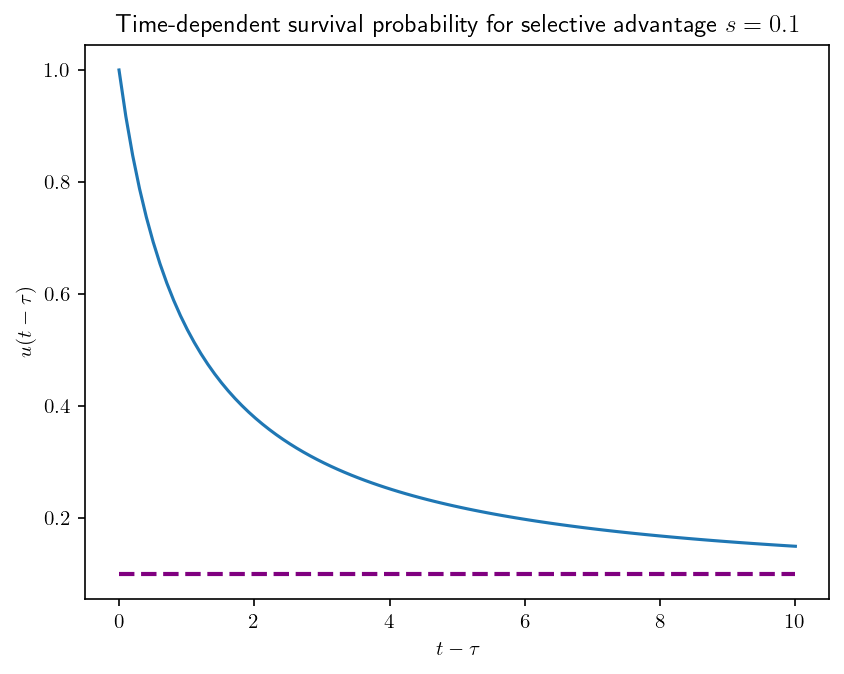

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 10
t = np.linspace(start=0, stop=tmax, num=100)
y = s/(1-(1-s)*np.exp(-s*t)) 

# Add title and axis names
plt.title(r'Time-dependent survival probability for selective advantage $s = 0.1$')
plt.xlabel(r'$t- \tau $')
plt.ylabel(r'$u(t-\tau)$')

plt.hlines(y = s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.plot(t, y)
plt.show()

First notice that we have a special solution $G_x^\infty\equiv G_x(t-\tau\to\infty)=(1-s)$, which simply corresponds to the fact that with probability $(1-s)$ the process goes extinct ($N(t)=0$).

Substituting $G_x(t)=G_x^\infty+g_x(t)$, we have to solve the homogeneous equation

$$
-\partial_\tau g_x = -s g_x + g_x^2
$$
subject to final condition $x=G_x(t)=g_x(t)+1-s$, i.e., $g_x(t)=s+x-1$, and the long-time limit $g_x(-\infty)=0$.

This logistic differential equation can be solved for $x\leq 1$ (indicating the radius of convergence) as above, yielding 

$$
G_x(t) = 1-s+\frac{s}{1+e^{s(t-\tau)}\frac{1-x}{s+x-1}}\;.
$$


A power series expansion returns the sought after abundance distribution, which for $\tau=0$ is given by

$$
    p_n(t)=\left\{\begin{array}{cc}
  & 
\begin{array}{cc}
 s^2 e^{s t} \left(e^{s t}-1\right)^{n-1} \left(e^{s t}+s-1\right)^{-n-1} & n\geq 1 \\
 \frac{(1-s) \left(e^{s t}-1\right)}{e^{s t}+s-1} & n=0 \\
\end{array}
 \\
\end{array}\right.
$$  (abundance-pdf)

Notice that $p_0(t)=1-u(t)$ as expected.

Since the distribution is quite broad, one would like to know some characteristic features. The mean is given by 

$$
    \langle N(t) \rangle =\partial_x|_{x=1} G_x(t)=e^{st}
$$  (mean abundance)
which again is a sanity check.

But, more interesting, is the mean given survival,

$$
    \langle N(t)|N(t)\geq1 \rangle =\frac{e^{st}}{u(t)}=1+\frac{e^{s t}-1}{s}
$$  (mean abundance)


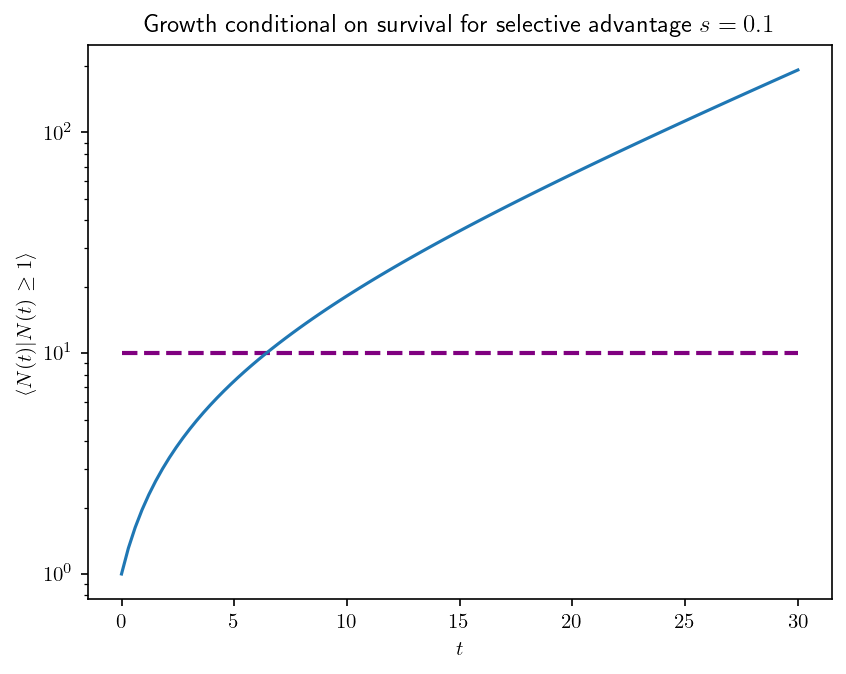

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 30
t = np.linspace(start=0, stop=tmax, num=100)
y = 1+(np.exp(s*t)-1)/s 

# Add title and axis names
plt.title(r'Growth conditional on survival for selective advantage $s = 0.1$')
plt.xlabel(r'$t $')
plt.ylabel(r'$\langle N(t)|N(t)\geq1 \rangle $')

plt.hlines(y = 1/s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.yscale("log")

plt.plot(t, y)
plt.show()

```{note}
Given survival, exponential growth kicks in not until $N(t)\approx s^{-1}$
```


## Citations

```{bibliography}
```